In [1]:
import pandas as pd
import numpy as np

#arquivo csv é necessário fazer alguns tratamentos: 
#primeiro separador de colunas é ','; 
#descobrir o encoding; 
#trocar a ',' na coluna altura por '.'
#tirar o espaço da coluna "AlTURA"
mundial_06 = pd.read_csv(r'Mundial 2006.csv',sep= ',',encoding='latin1',skipinitialspace = True, thousands = '.', decimal = ',', dtype ={'ALTURA':np.float64})
display(mundial_06)

,Nº,NOME,IDADE,ALTURA,POSIÇÃO
0,1,Walewska,27,1.90,Meio de rede
1,2,Carol Albuquerque,29,1.82,Levantadora
2,3,Mari,23,1.88,Ponteira
3,4,Paula,24,1.84,Ponteira
4,5,Carol Gattaz,25,1.92,Meio de rede
5,7,Fofão,36,1.73,Levantadora
6,9,Fabiana,21,1.93,Meio de rede
7,10,Sassá,24,1.79,Ponteira
8,12,Jaque,22,1.86,Ponteira
9,13,Sheilla,23,1.85,Oposto


In [2]:
mundial_06.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Nº       12 non-null     int64  
 1   NOME     12 non-null     object 
 2   IDADE    12 non-null     int64  
 3   ALTURA   12 non-null     float64
 4   POSIÇÃO  12 non-null     object 
dtypes: float64(1), int64(2), object(2)
memory usage: 608.0+ bytes


Text(0.5, 1.0, 'Mundial 2006 - Altura')

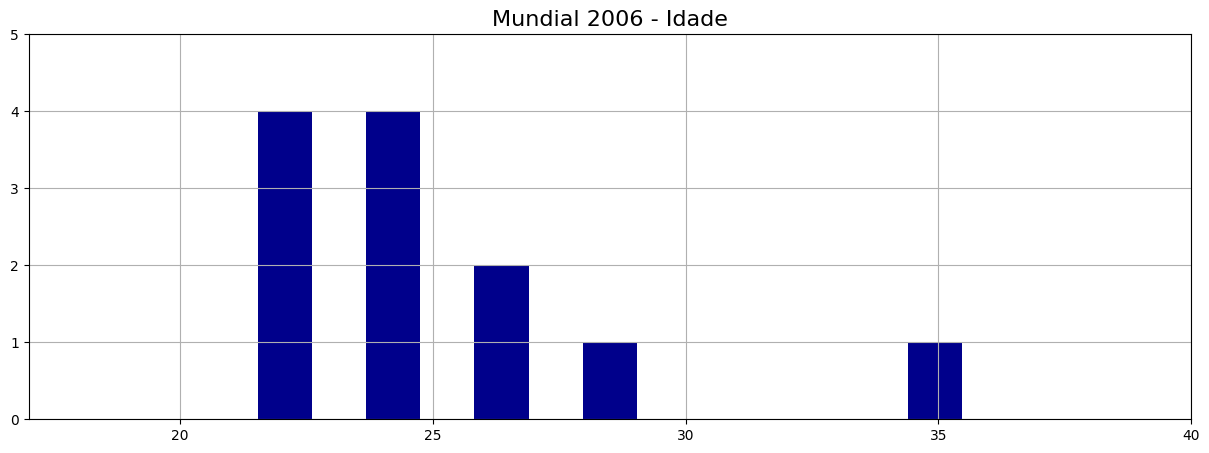

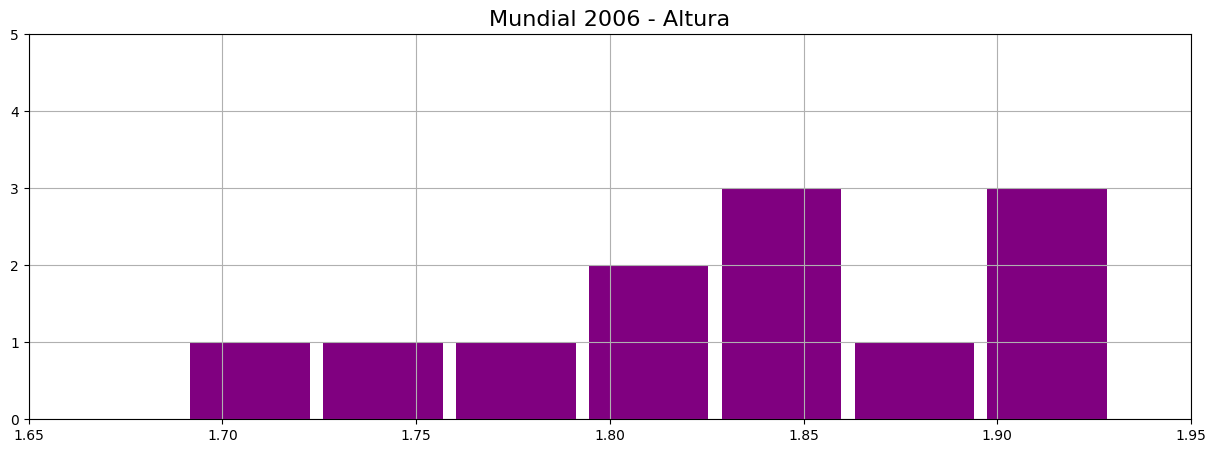

In [3]:
#contagem de idade e altura
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
mundial_06['IDADE'].hist(bins=7, rwidth=0.50, color="darkblue")
plt.xlim(17,40) 
plt.ylim(0,5)
plt.title("Mundial 2006 - Idade", fontsize = 16)

plt.figure(figsize=(15,5))
mundial_06['ALTURA'].hist(bins=7, rwidth=0.90, color="purple")
plt.xlim(1.65,1.95) 
plt.ylim(0,5)
plt.title("Mundial 2006 - Altura", fontsize = 16)

In [4]:
##qtde por posição
mundial_06['POSIÇÃO'].value_counts()

Ponteira        4
Meio de rede    3
Levantadora     2
Oposto          2
Líbero          1
Name: POSIÇÃO, dtype: int64

In [5]:
#média de altura
round(mundial_06.ALTURA.mean(), 2)

1.83

In [6]:
#média de idade
round(mundial_06.IDADE.mean(), 2)

25.42

In [7]:
#ordenar por jogadora mais velha
mundial_06.groupby('NOME')['IDADE'].max().sort_values(ascending=False)

NOME
Fofão                36
Carol Albuquerque    29
Walewska             27
Fabí                 26
Carol Gattaz         25
Renatinha            25
Paula                24
Sassá                24
Mari                 23
Sheilla              23
Jaque                22
Fabiana              21
Name: IDADE, dtype: int64

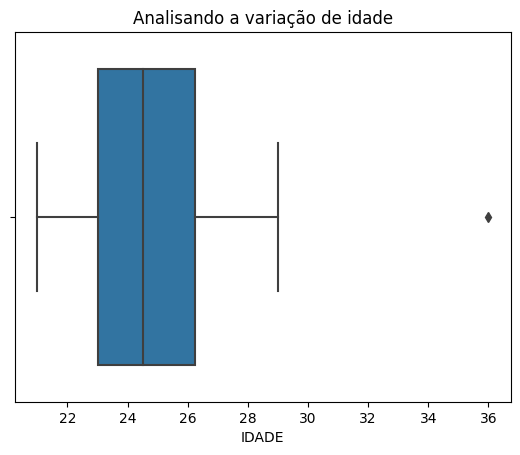

In [9]:
import seaborn as sns
# Analise grafica
plt.title('Analisando a variação de idade')
sns.boxplot(data=mundial_06, x='IDADE');

In [10]:
#ordenar por jogadora mais alta
mundial_06.groupby('NOME')['ALTURA'].max().sort_values(ascending=False)

NOME
Fabiana              1.93
Carol Gattaz         1.92
Walewska             1.90
Mari                 1.88
Jaque                1.86
Sheilla              1.85
Paula                1.84
Carol Albuquerque    1.82
Renatinha            1.81
Sassá                1.79
Fofão                1.73
Fabí                 1.69
Name: ALTURA, dtype: float64

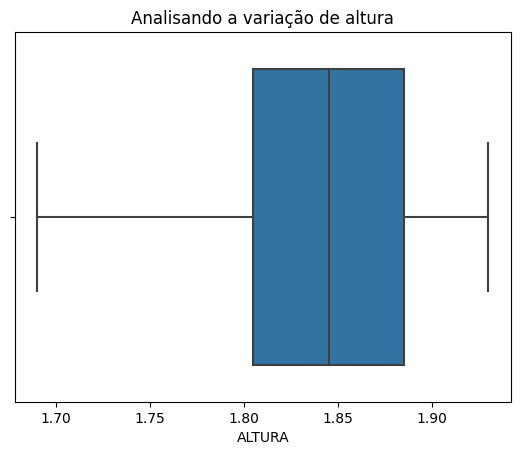

In [11]:
# Analise grafica
plt.title('Analisando a variação de altura')
sns.boxplot(data=mundial_06, x='ALTURA');

In [12]:
#média de altura por posição
mundial_06.groupby('POSIÇÃO')['ALTURA'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Meio de rede    1.92
Ponteira        1.84
Oposto          1.83
Levantadora     1.78
Líbero          1.69
Name: ALTURA, dtype: float64

In [13]:
#média de idade por posição
mundial_06.groupby('POSIÇÃO')['IDADE'].mean().sort_values(ascending=False).round(2)

POSIÇÃO
Levantadora     32.50
Líbero          26.00
Meio de rede    24.33
Oposto          24.00
Ponteira        23.25
Name: IDADE, dtype: float64

(20.0, 34.0)

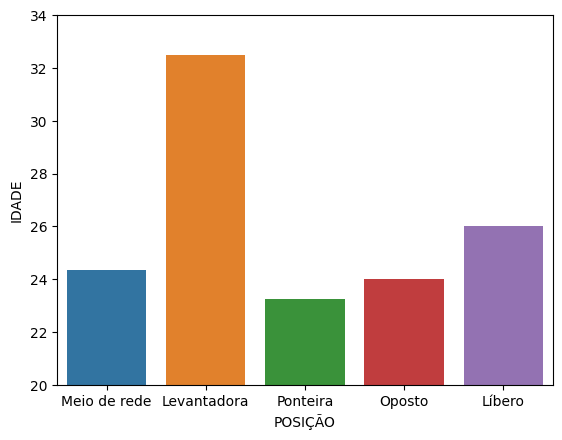

In [14]:
#média de idade por posição
mundial_06.groupby('POSIÇÃO')['IDADE'].mean()
media_idade = sns.barplot(x='POSIÇÃO', y='IDADE', data=mundial_06, ci=None)
media_idade.set_ylim(20,34)

(1.6, 1.95)

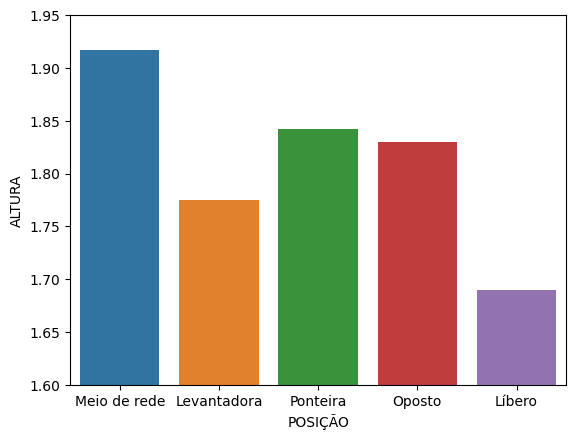

In [15]:
#média de altura por posição
mundial_06.groupby('POSIÇÃO')['ALTURA'].mean()
media_altura = sns.barplot(x='POSIÇÃO', y='ALTURA', data=mundial_06, ci=None)
media_altura.set_ylim(1.60, 1.95)

In [16]:
#criando coluna para mostrar novatas e experientes(novatas <= 25)
import sys

mundial_06['FAIXA ETÁRIA']=pd.cut(
    mundial_06['IDADE'],
    bins=[0, 25, sys.maxsize],
    labels=['Novata', 'Experiente']

)
mundial_06

,Nº,NOME,IDADE,ALTURA,POSIÇÃO,FAIXA ETÁRIA
0,1,Walewska,27,1.90,Meio de rede,Experiente
1,2,Carol Albuquerque,29,1.82,Levantadora,Experiente
2,3,Mari,23,1.88,Ponteira,Novata
3,4,Paula,24,1.84,Ponteira,Novata
4,5,Carol Gattaz,25,1.92,Meio de rede,Novata
5,7,Fofão,36,1.73,Levantadora,Experiente
6,9,Fabiana,21,1.93,Meio de rede,Novata
7,10,Sassá,24,1.79,Ponteira,Novata
8,12,Jaque,22,1.86,Ponteira,Novata
9,13,Sheilla,23,1.85,Oposto,Novata


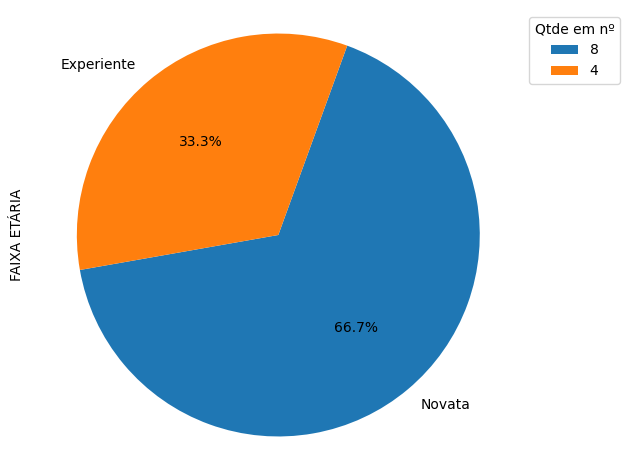

In [17]:
mundial_06['FAIXA ETÁRIA'].value_counts().plot(kind='pie',autopct='%1.1f%%',startangle=190)
plt.legend(mundial_06['FAIXA ETÁRIA'].value_counts(), title="Qtde em nº",  bbox_to_anchor=(1, 1))
plt.axis('equal')
plt.tight_layout()